# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"  # Constructing the URL correctly
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | mahibadhoo
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | cill airne
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | sechenovo
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | gonzaga
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | fort st. john
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | shahr-e babak
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | mossendjo
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.09,69,77,5.56,GS,1712756398
1,mahibadhoo,3.7833,72.9667,29.77,71,83,5.36,MV,1712756398
2,chonchi,-42.6128,-73.8092,10.62,76,23,1.60,CL,1712756398
3,cill airne,52.0500,-9.5167,15.03,88,75,13.38,IE,1712756398
4,college,64.8569,-147.8028,-3.22,80,20,1.54,US,1712756398


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.09,69,77,5.56,GS,1712756398
1,mahibadhoo,3.7833,72.9667,29.77,71,83,5.36,MV,1712756398
2,chonchi,-42.6128,-73.8092,10.62,76,23,1.60,CL,1712756398
3,cill airne,52.0500,-9.5167,15.03,88,75,13.38,IE,1712756398
4,college,64.8569,-147.8028,-3.22,80,20,1.54,US,1712756398


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

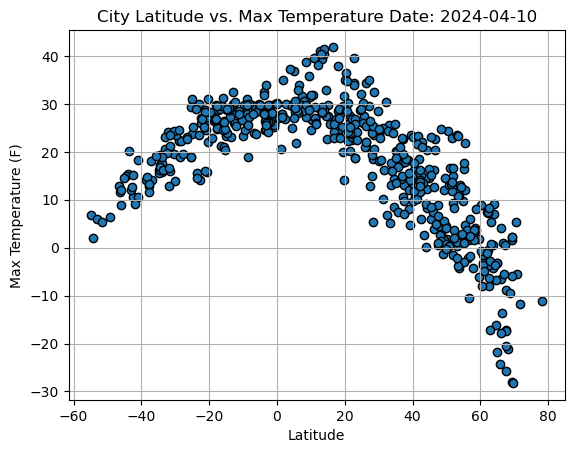

In [27]:
# Make a copy of the DataFrame
city_data_df_copy = city_data_df.copy()

# Convert Unix timestamps to regular date format
city_data_df_copy["Date"] = pd.to_datetime(city_data_df_copy["Date"], unit='s')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df_copy["Lat"], city_data_df_copy["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties including the date in the title
plt.title("City Latitude vs. Max Temperature Date: {}".format(city_data_df_copy["Date"].iloc[0].strftime("%Y-%m-%d")))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

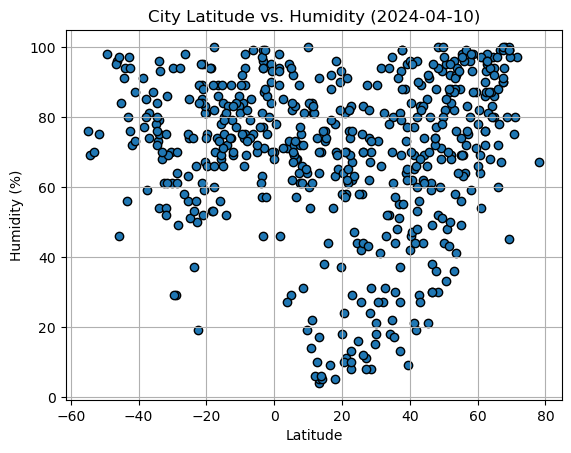

In [29]:

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df_copy["Lat"], city_data_df_copy["Humidity"], marker="o", edgecolors="black")

# Set the title and labels including the date in the title
plt.title(f"City Latitude vs. Humidity ({city_data_df_copy['Date'].iloc[0].strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

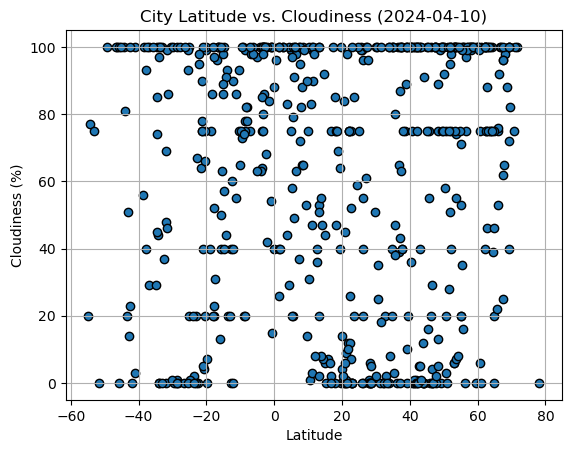

In [30]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df_copy["Lat"], city_data_df_copy["Cloudiness"], marker="o", edgecolors="black")

# Set the title and labels
plt.title(f"City Latitude vs. Cloudiness ({city_data_df_copy['Date'].iloc[0].strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

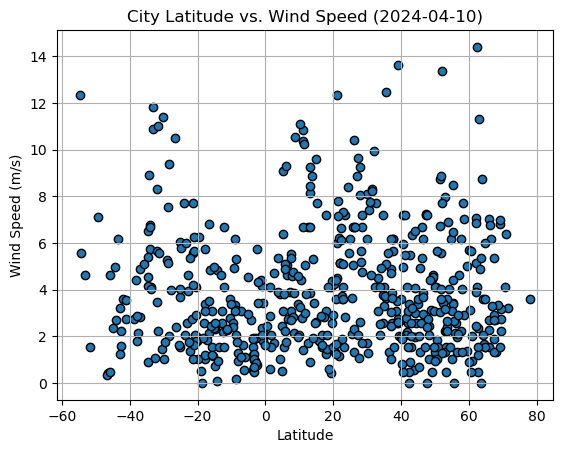

In [31]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df_copy["Lat"], city_data_df_copy["Wind Speed"], marker="o", edgecolors="black")

# Set the title and labels
plt.title(f"City Latitude vs. Wind Speed ({city_data_df_copy['Date'].iloc[0].strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Set the grid
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the DataFrame for Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mahibadhoo,3.7833,72.9667,29.77,71,83,5.36,MV,1712756398
3,cill airne,52.0500,-9.5167,15.03,88,75,13.38,IE,1712756398
4,college,64.8569,-147.8028,-3.22,80,20,1.54,US,1712756398
5,utrik,11.2278,169.8474,26.63,83,100,10.86,MH,1712756398
6,sechenovo,55.2244,45.8906,16.34,49,53,3.44,RU,1712756398


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.09,69,77,5.56,GS,1712756398
2,chonchi,-42.6128,-73.8092,10.62,76,23,1.60,CL,1712756398
9,blackmans bay,-43.0167,147.3167,12.07,80,51,3.22,AU,1712756399
10,arraial do cabo,-22.9661,-42.0278,29.92,66,20,2.57,BR,1712756399
15,invercargill,-46.4000,168.3500,11.68,96,100,0.41,NZ,1712756355


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8603580537812298


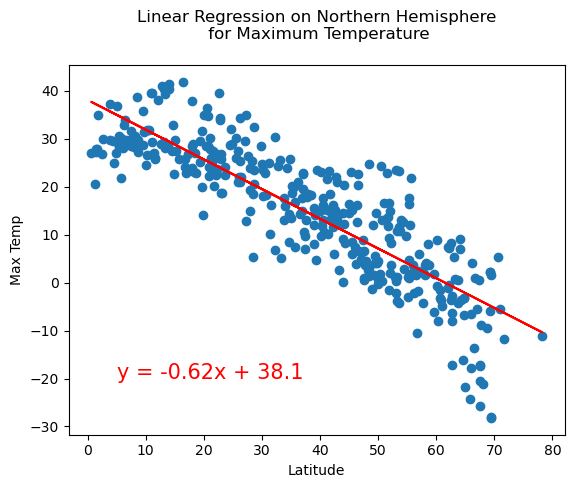

In [15]:
# Perform linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                      f"Linear Regression on Northern Hemisphere\n for Maximum Temperature\n",
                      "Latitude", "Max Temp", (5, -20))



The r-value is: 0.8242492124468713


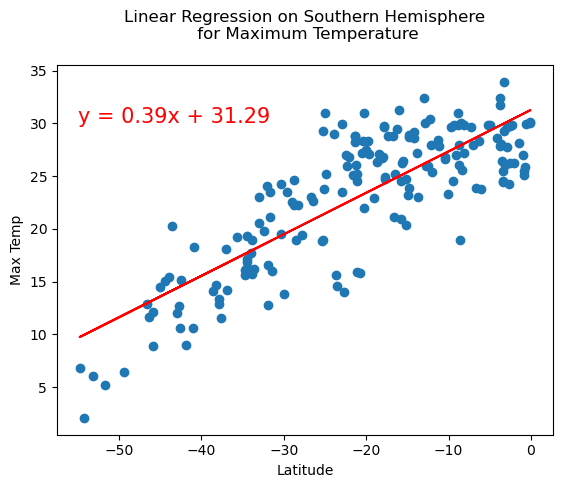

In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       f"Linear Regression on Southern Hemisphere\n for Maximum Temperature\n", 
                       "Latitude", "Max Temp", (-55, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Observation for Northern Hemisphere: When you move away from the equator towards the North Pole (higher latitudes), temperatures tend to drop. So, there's a noticeable pattern: higher latitudes generally mean cooler temperatures. This relationship is quite clear and reliable.

Observation for Southern Hemisphere: This one is the very opposite of above. As you move towards the equator from the South Pole (higher latitudes), temperatures tend to rise. So, in this part of the world, higher latitudes generally mean warmer temperatures. This relationship is also quite clear and reliable.

Overall, it seems that the location's latitude is a good indicator of what the temperature might be like, whether in the northern or southern part of the globe.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3038165084691772


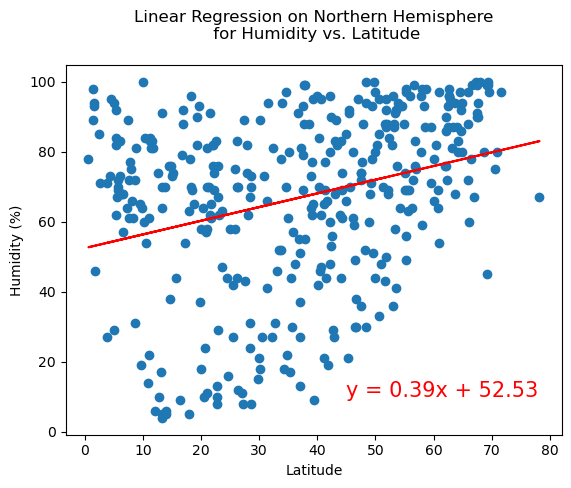

In [17]:
# Perform linear regression on Northern Hemisphere humidity vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       f"Linear Regression on Northern Hemisphere\n for Humidity vs. Latitude\n", 
                       "Latitude", "Humidity (%)", (45, 10))


The r-value is: 0.07584614707178697


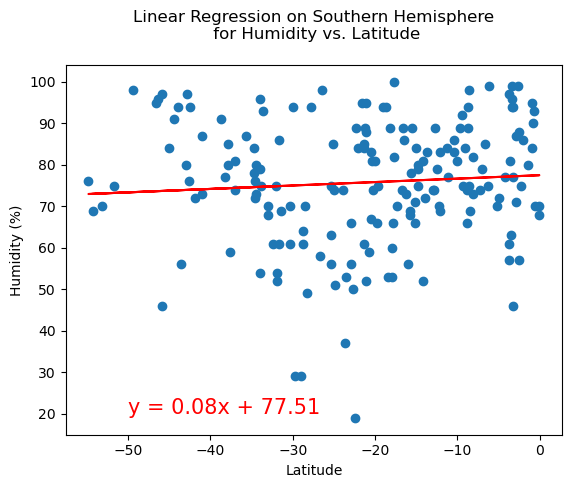

In [18]:
# Perform linear regression on Southern Hemisphere humidity vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       f"Linear Regression on Southern Hemisphere\n for Humidity vs. Latitude\n", 
                       "Latitude", "Humidity (%)", (-50, 20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

Observations for the Northern Hemisphere: As you go farther north, towards higher latitudes, humidity tends to increase. The data shows a clear trend: higher latitudes have higher humidity levels.

Observations for the Southern Hemisphere: Similarly, as you move closer to the equator from the South Pole (higher latitudes), humidity levels also tend to increase. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13888727819481456


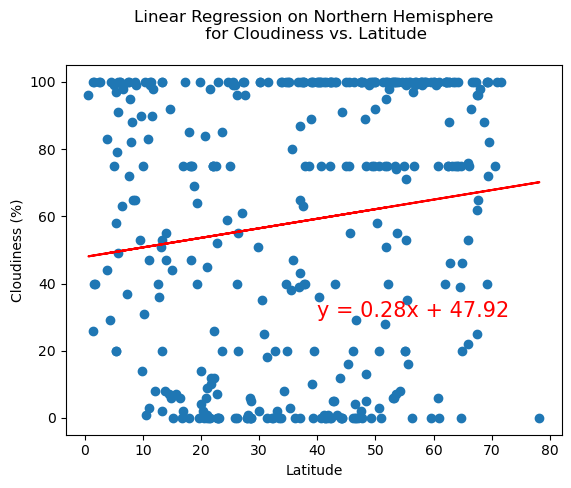

In [19]:
# Perform linear regression on Northern Hemisphere cloudiness vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],  
                        f"Linear Regression on Northern Hemisphere\n for Cloudiness vs. Latitude\n",
                        "Latitude", "Cloudiness (%)", (40, 30))


The r-value is: 0.2604883046427812


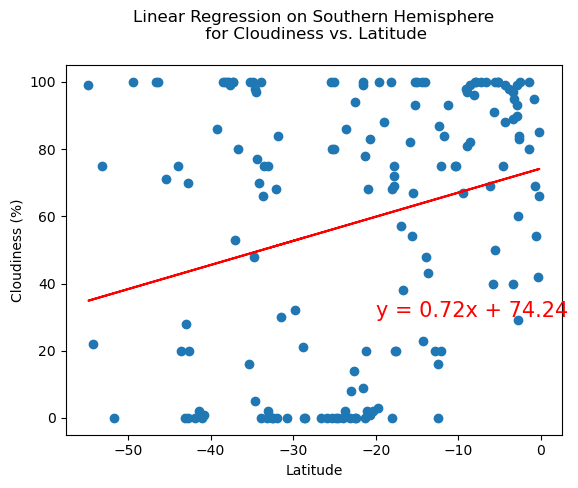

In [93]:
# Perform linear regression on Southern Hemisphere cloudiness vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                        f"Linear Regression on Southern Hemisphere\n for Cloudiness vs. Latitude\n",
                        "Latitude", "Cloudiness (%)", (-20, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The analysis shows that there isn't a strong connection between cloudiness and latitude in either the Northern or Southern Hemisphere. This means that changes in latitude don't seem to have much impact on cloudiness levels. Since the r-values are close to zero, it suggests that there is little to no linear association between cloudiness and latitude in either hemisphere. As such, changes in latitude do not significantly explain variations in cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10288980493824167


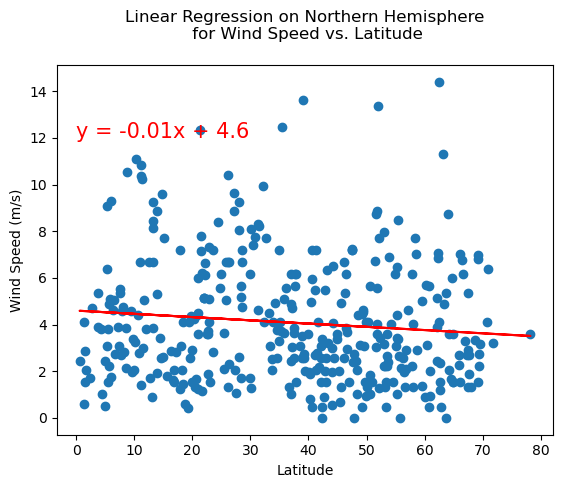

In [20]:
# Perform linear regression on Northern Hemisphere wind speed vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       f"Linear Regression on Northern Hemisphere\n for Wind Speed vs. Latitude\n", 
                       "Latitude", "Wind Speed (m/s)", (0, 12))


The r-value is: -0.33026737579275894


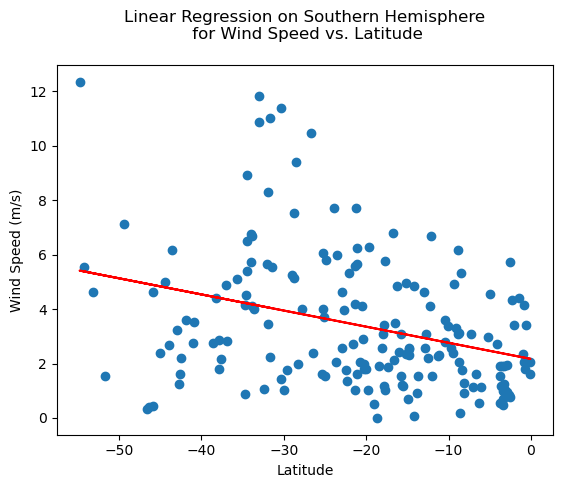

In [21]:
# Perform linear regression on Southern Hemisphere wind speed vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Print the r-value
print("The r-value is:", r_value)

# Plot the linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       f"Linear Regression on Southern Hemisphere\n for Wind Speed vs. Latitude\n", 
                       "Latitude", "Wind Speed (m/s)", (-50, 15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The analysis suggests that there is a weak to no relationship between wind speed and latitude in both the Northern and Southern Hemispheres. This indicates that latitude changes don't significantly affect wind speed levels. For wind speed versus latitude, the r-value is close to zero for both the Northern and Southern Hemispheres, indicating a weak correlation. This means that as latitude changes, there isn't a consistent trend or pattern in wind speed variation.